In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/nexus-admin/NEXUS_RF/BackendTools')
import TimestreamHelperFunctions as Thf
import PulseTriggeringTools as Ptt

import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf

%matplotlib notebook

# Define the runs of interest with LED voltages

In [2]:
## Define the runs of interest
run_dict = {"series": [
    "20220721_123409",
    "20220721_123710",
    "20220721_124011",
    "20220720_150715",
    "20220720_150540",
    "20220720_144600",
    "20220720_150408",
    "20220720_150240",
    "20220720_150108",
#     "20220720_145935",
    "20220720_144037" ] , 
            "Vled"  : [
    4.0,
    3.8,
    3.6,
    3.4,
    3.2,
    3.0,
    2.8,
    2.6,
    2.4,
#     2.2,
    2.0 ] }
n_runs = len(run_dict["series"])
run_df = pd.DataFrame(run_dict)
print("Total runs:",n_runs)

Total runs: 10


# Get the data files

In [3]:
noise_files = np.zeros(n_runs, dtype='object')
vna_files   = np.zeros(n_runs, dtype='object')
powers      = np.zeros(n_runs)
i = 0

for series in run_df['series'].to_numpy():
    data_path = os.path.join('/data/USRP_Noise_Scans',series.split('_')[0],series)
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series, verbose=False)
    metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
    powers[i]      = metadata['power']
    noise_files[i] = tone_files[0]
    vna_files[i]   = vna_file
    i += 1
    
run_df["noise path"] = noise_files
run_df["vna path"]   = vna_files
run_df["power"]      = powers
run_df

series  Vled                                         noise path  \
0  20220721_123409   4.0  /data/USRP_Noise_Scans/20220721/20220721_12340...   
1  20220721_123710   3.8  /data/USRP_Noise_Scans/20220721/20220721_12371...   
2  20220721_124011   3.6  /data/USRP_Noise_Scans/20220721/20220721_12401...   
3  20220720_150715   3.4  /data/USRP_Noise_Scans/20220720/20220720_15071...   
4  20220720_150540   3.2  /data/USRP_Noise_Scans/20220720/20220720_15054...   
5  20220720_144600   3.0  /data/USRP_Noise_Scans/20220720/20220720_14460...   
6  20220720_150408   2.8  /data/USRP_Noise_Scans/20220720/20220720_15040...   
7  20220720_150240   2.6  /data/USRP_Noise_Scans/20220720/20220720_15024...   
8  20220720_150108   2.4  /data/USRP_Noise_Scans/20220720/20220720_15010...   
9  20220720_144037   2.0  /data/USRP_Noise_Scans/20220720/20220720_14403...   

                                            vna path  power  
0  /data/USRP_Noise_Scans/20220721/20220721_12340...  -40.0  
1  /data/USRP_Noise_Scans/20220721/20220721_12371...  -40.0  
2  /data/USRP_Noise_Scans/20220721/20220721_12401...  -40.0  
3  /data/USRP_Noise_Scans/20220720/20220720_15071...  -40.0  
4  /data/USRP_Noise_Scans/20220720/20220720_15054...  -40.0  
5  /data/USRP_Noise_Scans/20220720/20220720_14460...  -40.0  
6  /data/USRP_Noise_Scans/20220720/20220720_15040...  -40.0  
7  /data/USRP_Noise_Scans/20220720/20220720_15024...  -40.0  
8  /data/USRP_Noise_Scans/20220720/20220720_15010...  -40.0  
9  /data/USRP_Noise_Scans/20220720/20220720_14403...  -40.0

In [4]:
series = run_df["series"].iloc[2]
print(series)

20220721_124011


# Start with highest LED voltage

In [5]:
series = run_df["series"].iloc[0]
Vled   = run_df["Vled"].iloc[0]
print(series, ":", Vled, "V")

20220721_123409 : 4.0 V


Line Delay file:  /data/USRP_Noise_Scans/20220721/20220721_123409/USRP_Delay_20220721_123409.h5
VNA scan file:    /data/USRP_Noise_Scans/20220721/20220721_123409/USRP_VNA_20220721_123409.h5
Timestream files: ['/data/USRP_Noise_Scans/20220721/20220721_123409/USRP_Noise_20220721_123409_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220721/20220721_123409/noise_averages_20220721_123409.h5


<IPython.core.display.Javascript object>


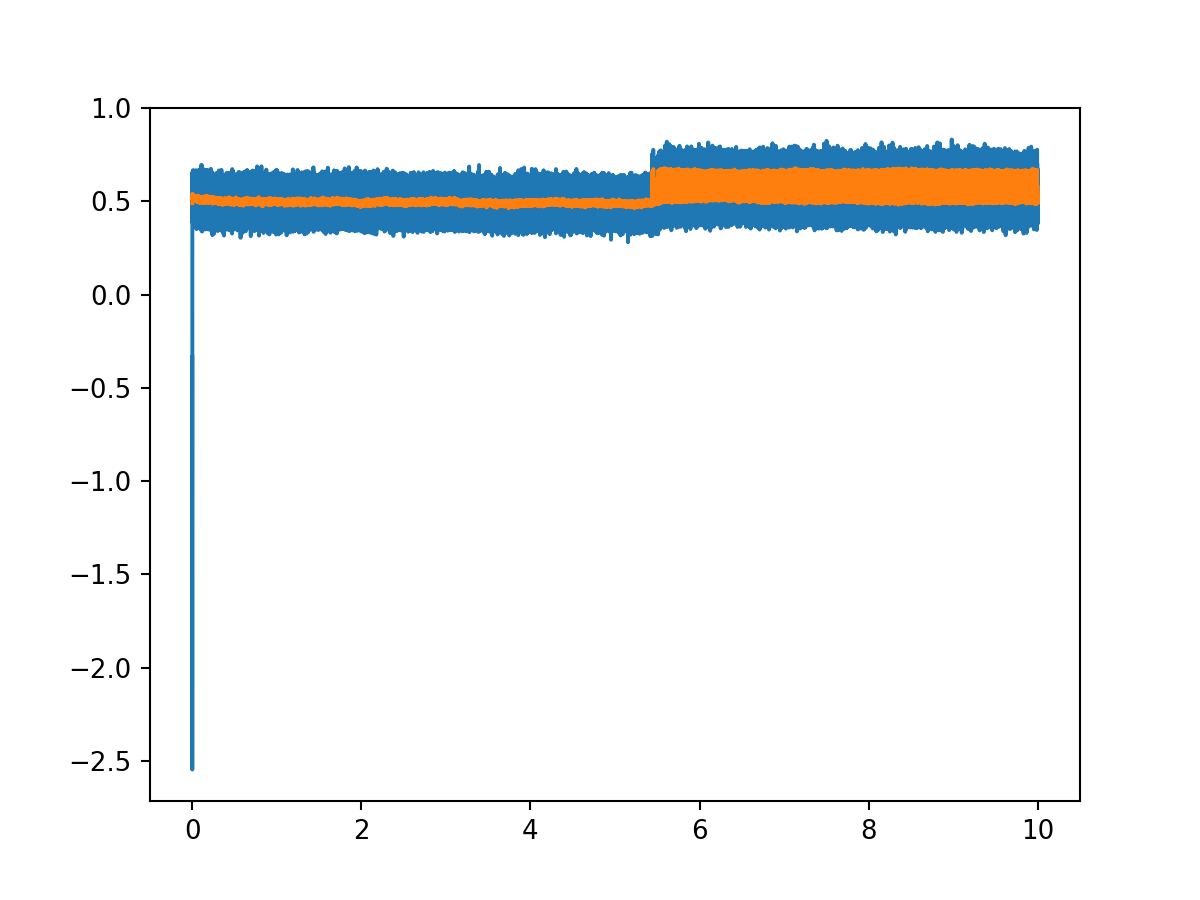

In [6]:
res = Ptt.readDataFile(series)

fig = plt.figure()
ax0 = fig.gca()

ax0.plot(res["Time"],res["Phase"])

xavg, yavg = Ptt.movavg_xy(res["Time"],res["Phase"],side_pts=100)
ax0.plot(xavg, yavg)

In [7]:
pulse_start_sec  = 6.4215 ## 5.670 ## 5.44225
N_pulses_to_find = 241 ## None

<IPython.core.display.Javascript object>


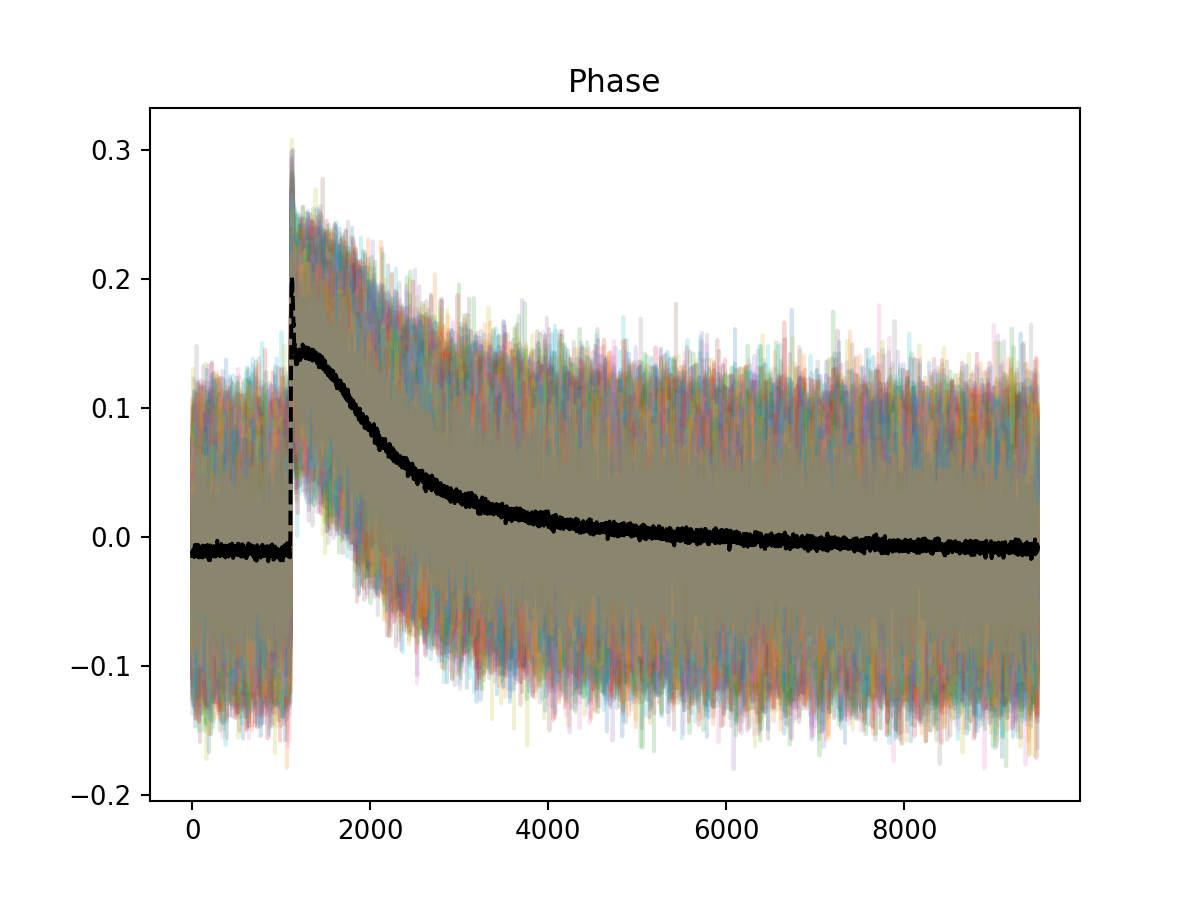

# pulses: 242


In [8]:
avg, npulses, bl, win = Ptt.StackPulses(res["Phase"], pulse_start_sec,
                                        win_fac=0.95, Npulses=N_pulses_to_find,
                                        bl_subtract=True, show_plots=True)
plt.gca().set_title("Phase")
print("# pulses:",npulses)

In [ ]:
avg, npulses, bl, win = Ptt.StackPulses(Ptt.movavg(res["Phase"],side_pts=50), pulse_start_sec,
                                        win_fac=0.95, Npulses=N_pulses_to_find,
                                        bl_subtract=True, show_plots=True)
plt.gca().set_title("Phase")
print("# pulses:",npulses)

In [ ]:
avg, npulses, bl, win = Ptt.StackPulses(res["Magnitude"], pulse_start_sec,
                                        win_fac=0.65, Npulses=N_pulses_to_find,
                                        bl_subtract=False, show_plots=True)
plt.gca().set_title("Magnitude")

In [ ]:
fig = plt.figure()
for i in np.arange(npulses):
    Ptt.PlotPulse(res["Magnitude"]*np.exp(1j*res["Phase"]),pulse_start_sec,p_index=i,complx=True,fig_obj=fig)

In [ ]:
powers, PSDs, res, timestreams = Thf.CleanPSDs(None,None,series=series, f_transient=0.05)

# Now onto the other voltages

20220721_124011 : 3.6 V
Line Delay file:  /data/USRP_Noise_Scans/20220721/20220721_124011/USRP_Delay_20220721_124011.h5
VNA scan file:    /data/USRP_Noise_Scans/20220721/20220721_124011/USRP_VNA_20220721_124011.h5
Timestream files: ['/data/USRP_Noise_Scans/20220721/20220721_124011/USRP_Noise_20220721_124011_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220721/20220721_124011/noise_averages_20220721_124011.h5


<IPython.core.display.Javascript object>


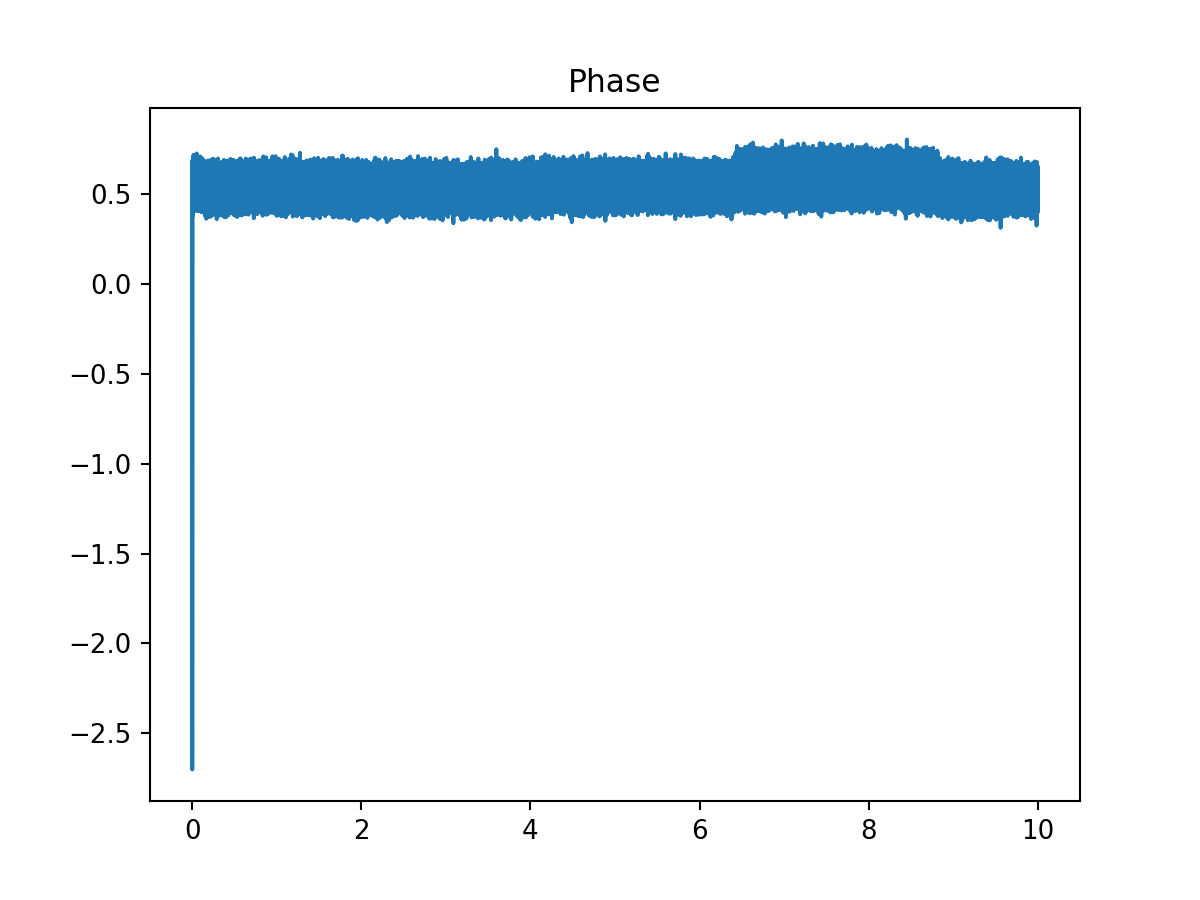

<IPython.core.display.Javascript object>


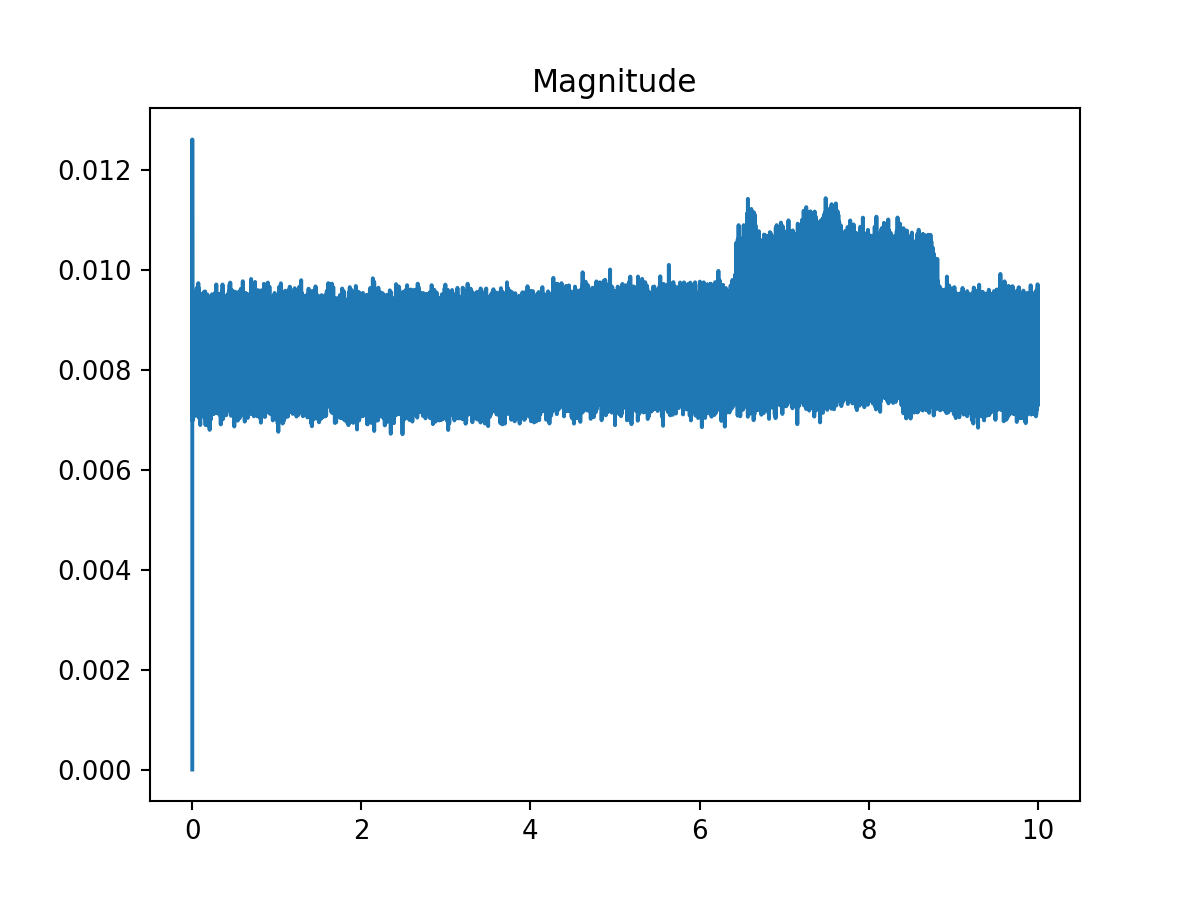

Text(0.5, 1.0, 'Magnitude')

In [4]:
i = 2
series = run_df["series"].iloc[i]
Vled   = run_df["Vled"].iloc[i]
print(series, ":", Vled, "V")
res = Ptt.readDataFile(series)

# xavg, yavg = Ptt.movavg_xy(res["Time"],res["Phase"],side_pts=50)

fig = plt.figure()
ax0 = fig.gca()

ax0.plot(res["Time"],res["Phase"])
ax0.set_title("Phase")
# ax0.plot(xavg, yavg)

fig = plt.figure()
ax1 = fig.gca()

ax1.plot(res["Time"],res["Magnitude"])
ax1.set_title("Magnitude")


In [5]:
# ### i=1
# pulse_start_sec  = 5.2285
# N_pulses_to_find = 260

### i=2
pulse_start_sec  = 6.4215
N_pulses_to_find = 241

# ### i=3
# pulse_start_sec  = 5.51241 ## 6.4215
# N_pulses_to_find = None

<IPython.core.display.Javascript object>


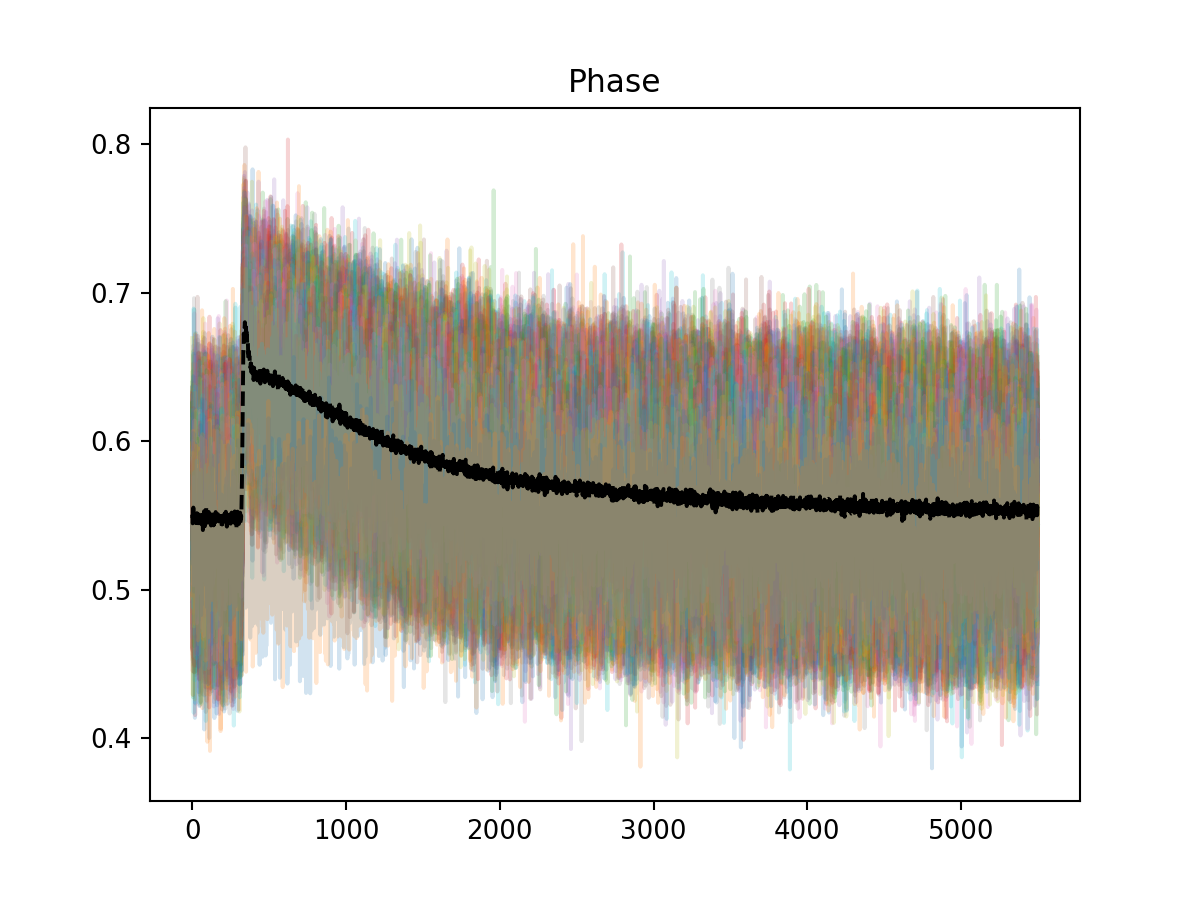

<IPython.core.display.Javascript object>


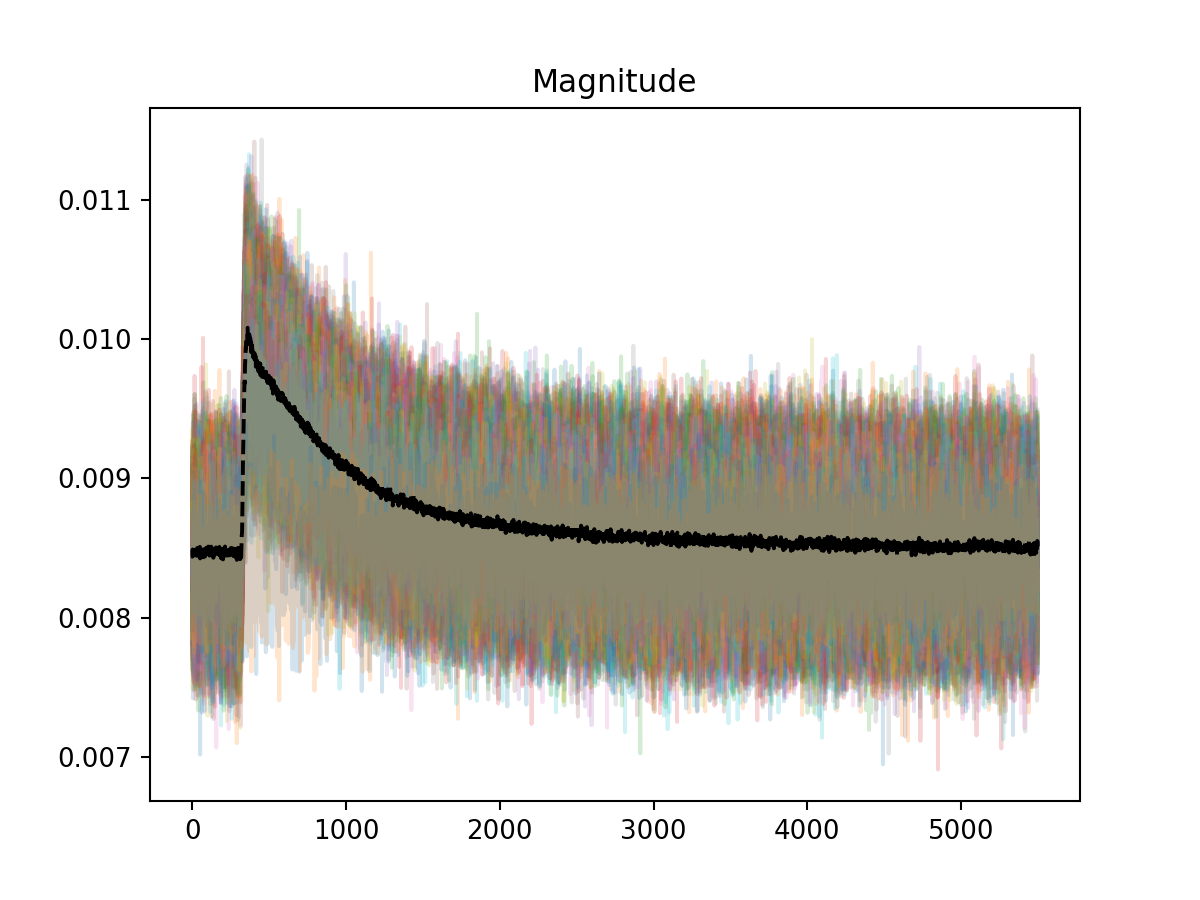

Text(0.5, 1.0, 'Magnitude')

In [6]:
avg, npulses, bl, win = Ptt.StackPulses(res["Phase"], pulse_start_sec,
                                        win_fac=0.55, Npulses=N_pulses_to_find,
                                        bl_subtract=False, show_plots=True)
plt.gca().set_title("Phase")

avg, npulses, bl, win = Ptt.StackPulses(res["Magnitude"], pulse_start_sec,
                                        win_fac=0.55, Npulses=N_pulses_to_find,
                                        bl_subtract=False, show_plots=True)
plt.gca().set_title("Magnitude")

<IPython.core.display.Javascript object>


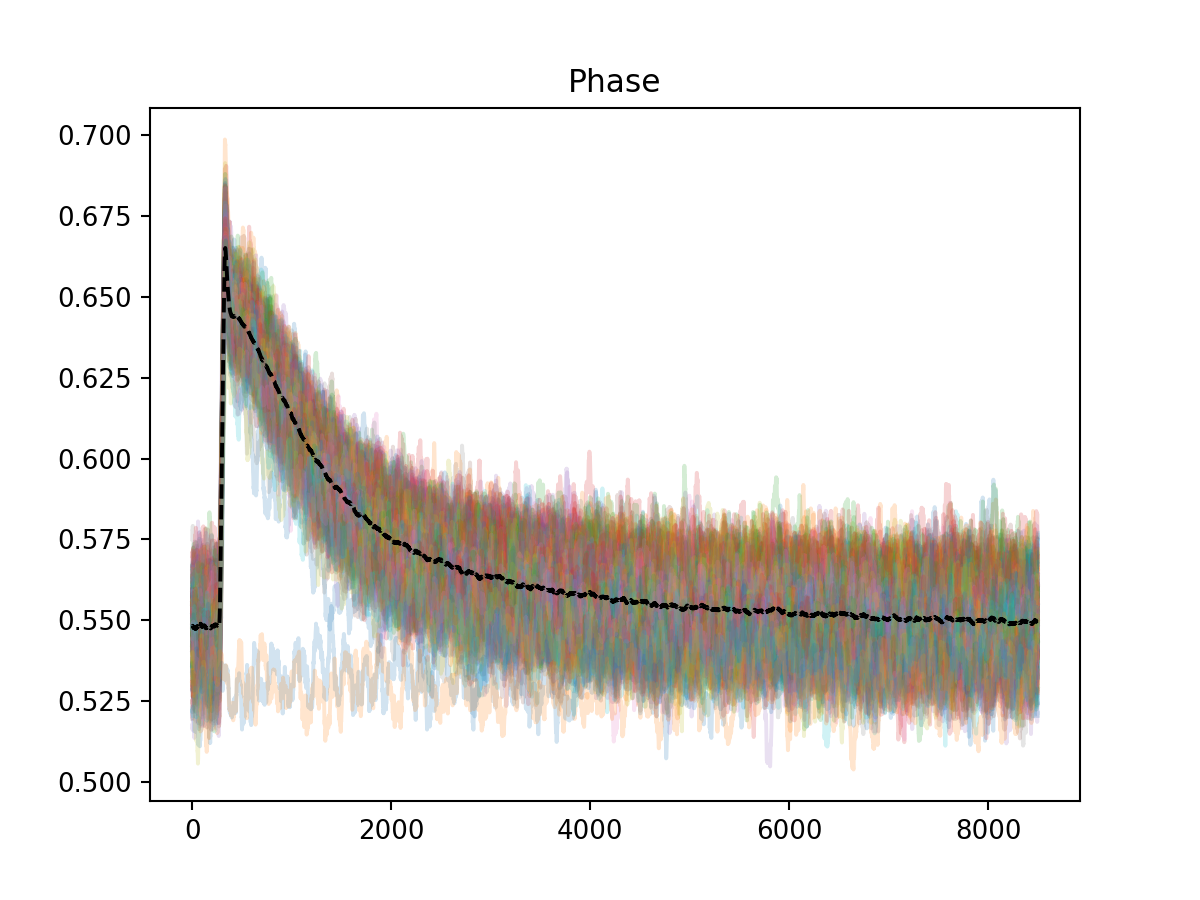

<IPython.core.display.Javascript object>


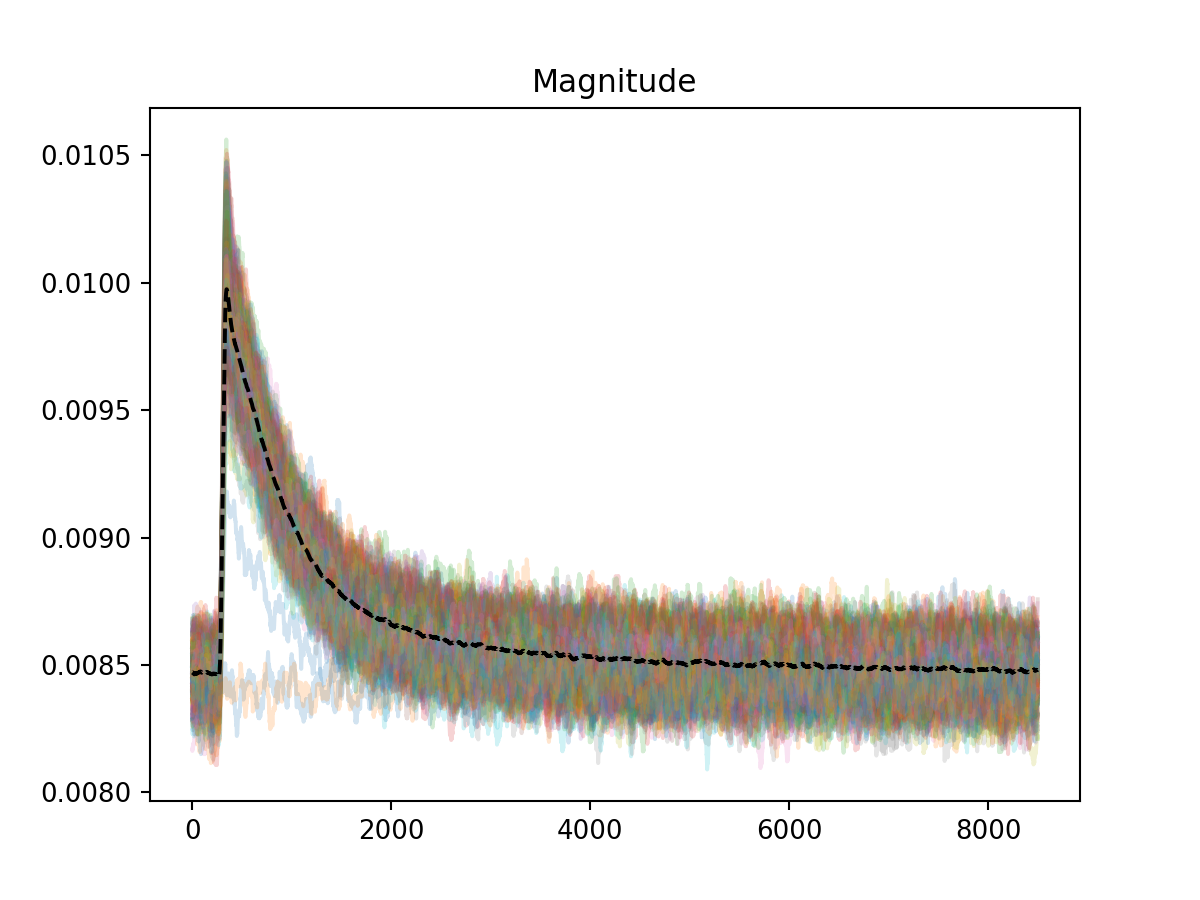

Text(0.5, 1.0, 'Magnitude')

In [7]:
avg, npulses, bl, win = Ptt.StackPulses(Ptt.movavg(res["Phase"],side_pts=25), pulse_start_sec,
                                        win_fac=0.85, Npulses=N_pulses_to_find,
                                        bl_subtract=False, show_plots=True)
plt.gca().set_title("Phase")

avg, npulses, bl, win = Ptt.StackPulses(Ptt.movavg(res["Magnitude"],side_pts=25), pulse_start_sec,
                                        win_fac=0.85, Npulses=N_pulses_to_find,
                                        bl_subtract=False, show_plots=True)
plt.gca().set_title("Magnitude")

Line Delay file:  /data/USRP_Noise_Scans/20220721/20220721_124011/USRP_Delay_20220721_124011.h5
VNA scan file:    /data/USRP_Noise_Scans/20220721/20220721_124011/USRP_VNA_20220721_124011.h5
Timestream files: ['/data/USRP_Noise_Scans/20220721/20220721_124011/USRP_Noise_20220721_124011_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220721/20220721_124011/noise_averages_20220721_124011.h5
Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20220721/20220721_124011/USRP_Noise_20220721_124011_delta0.h5 because override=True!
found 165 pulses
chunk length plugged into welch is 500
chunked data into 1000 timestreams
compu

<IPython.core.display.Javascript object>


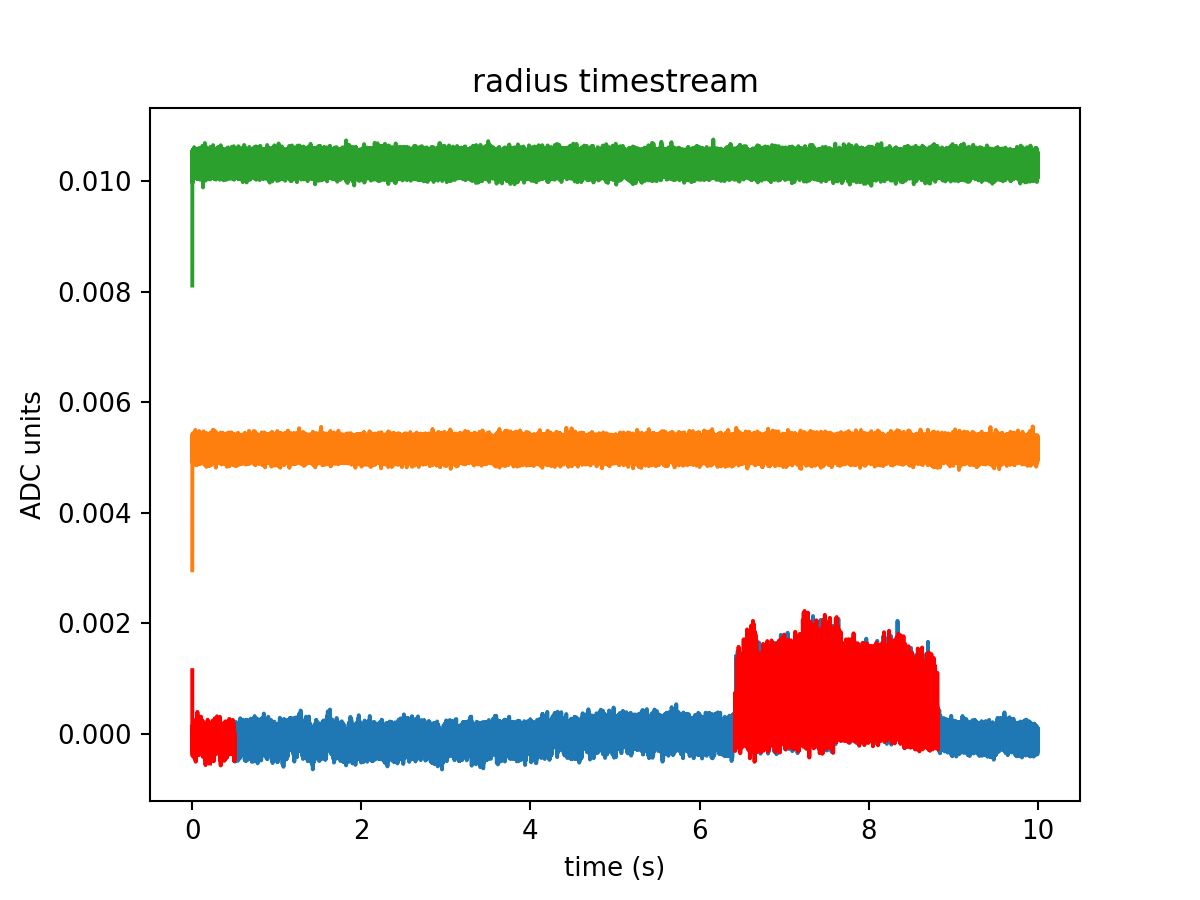

<IPython.core.display.Javascript object>


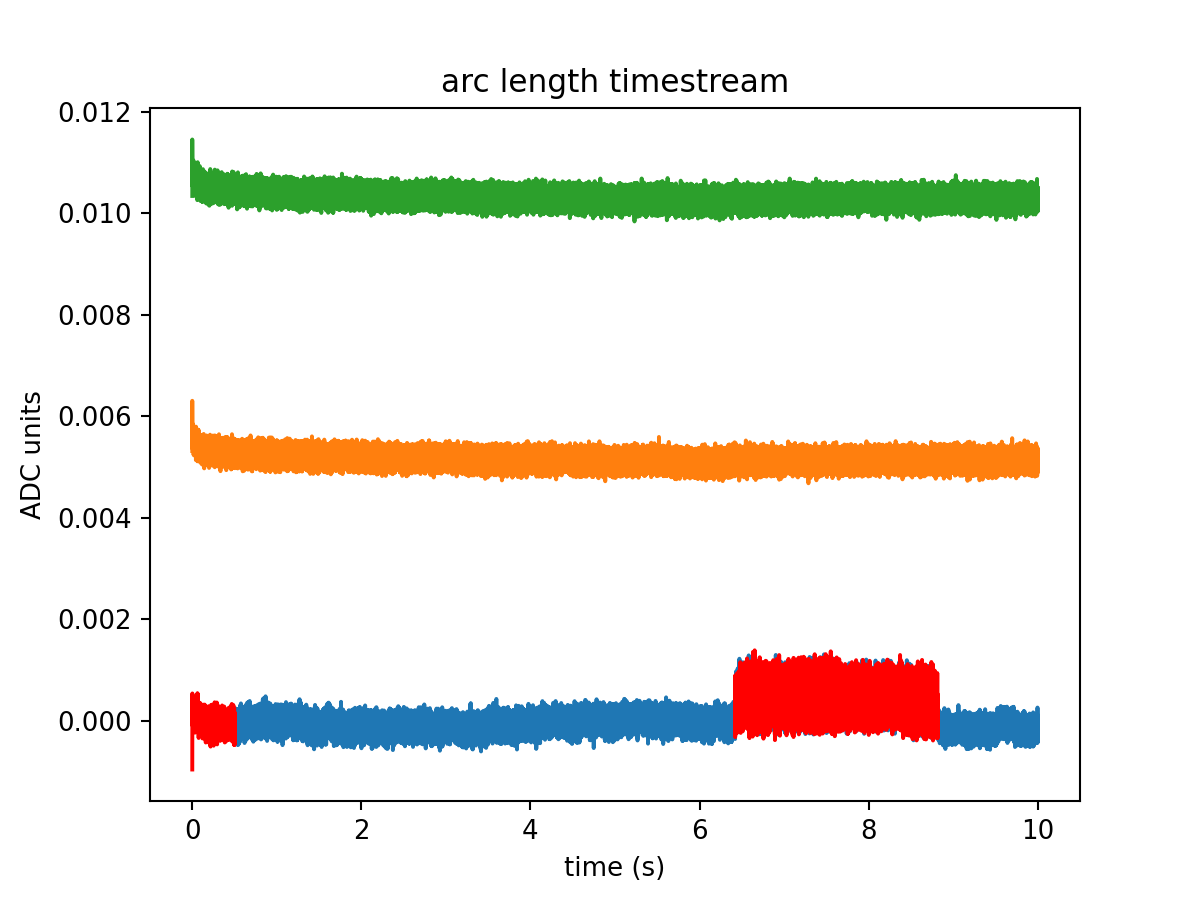

<IPython.core.display.Javascript object>


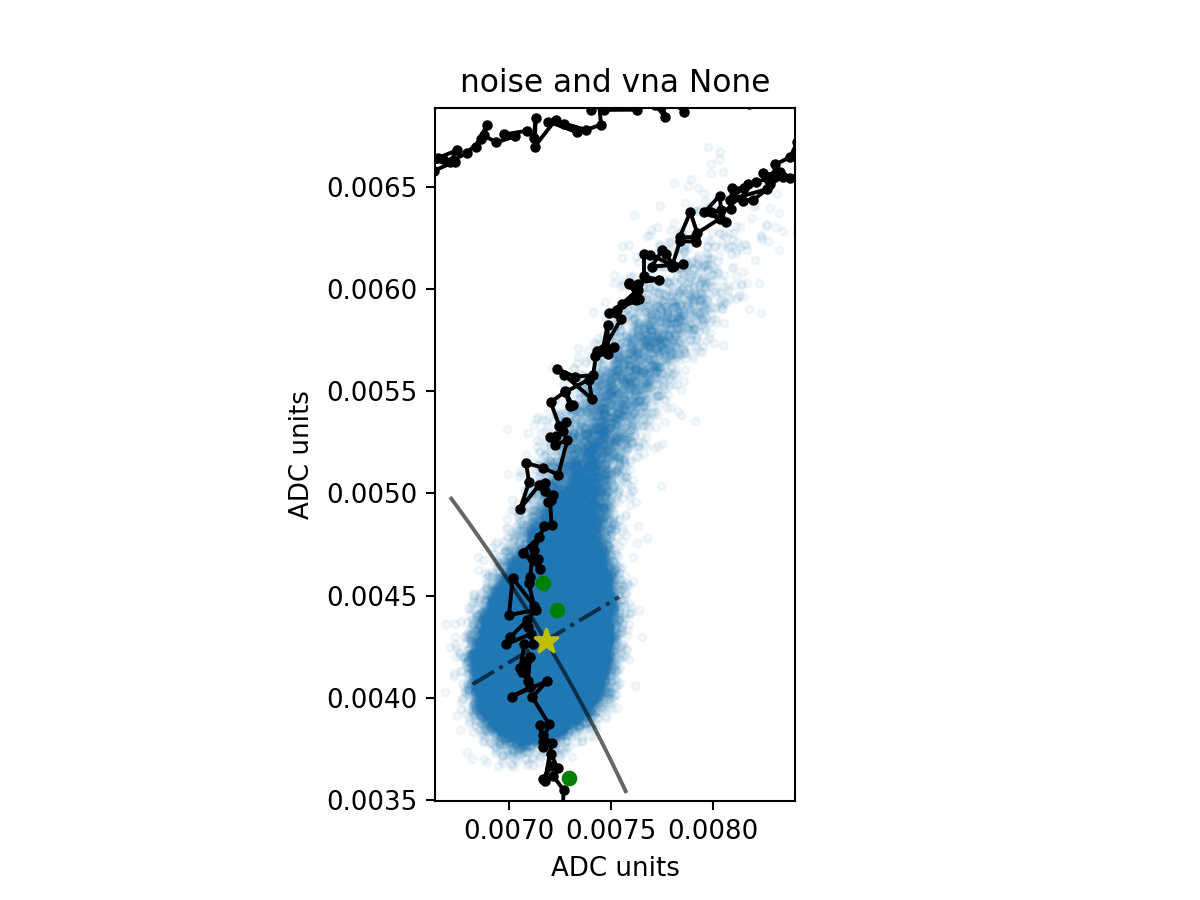

<IPython.core.display.Javascript object>


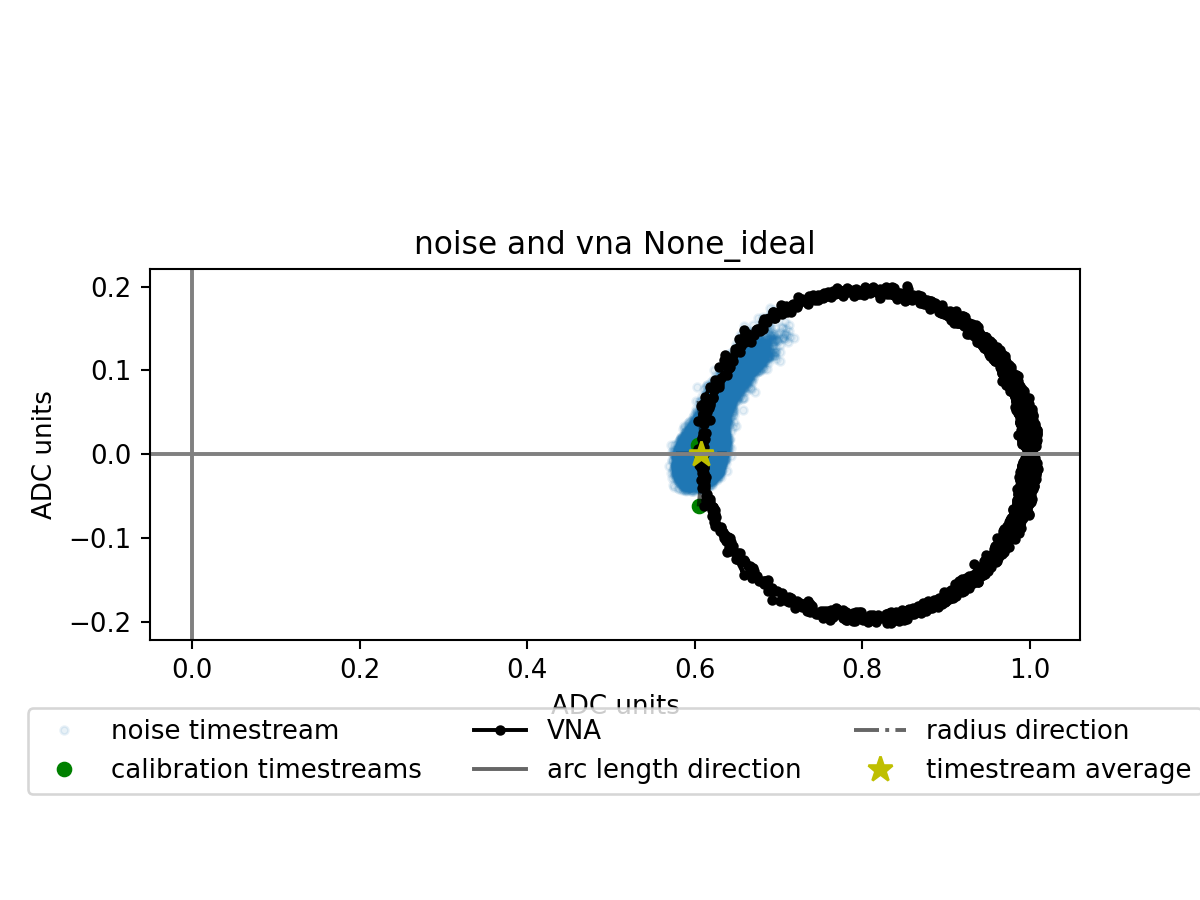

<IPython.core.display.Javascript object>


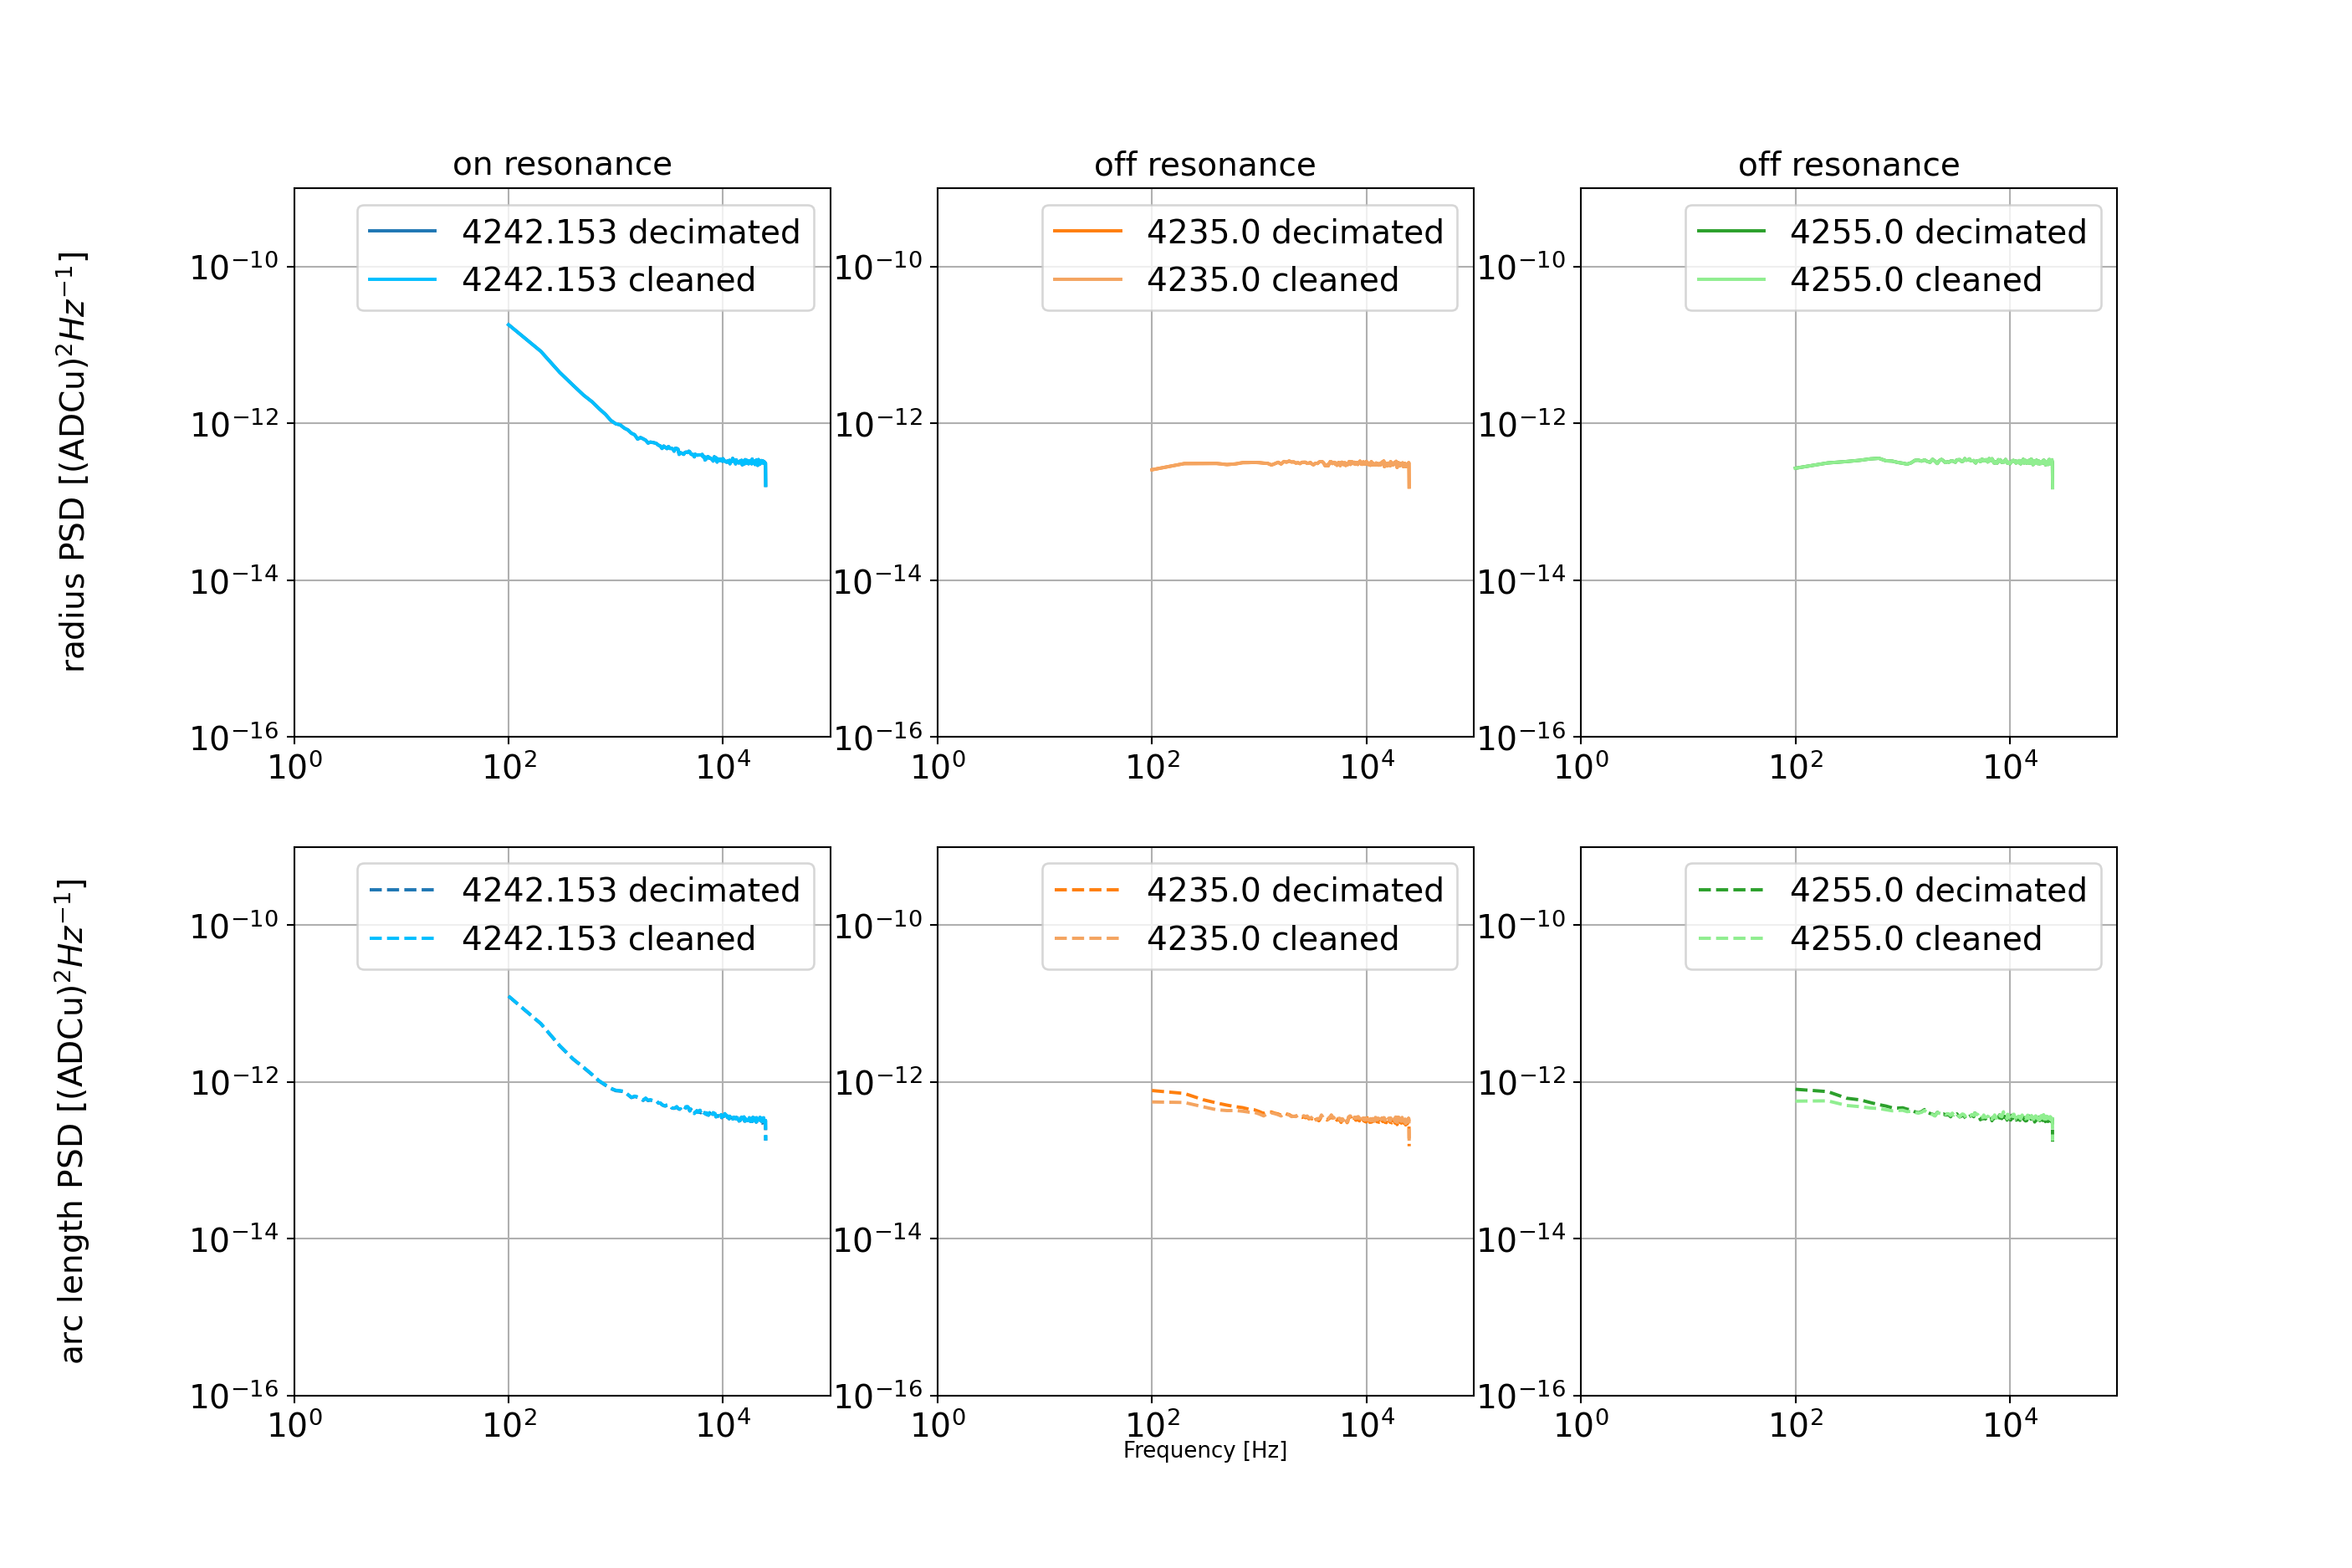

<IPython.core.display.Javascript object>


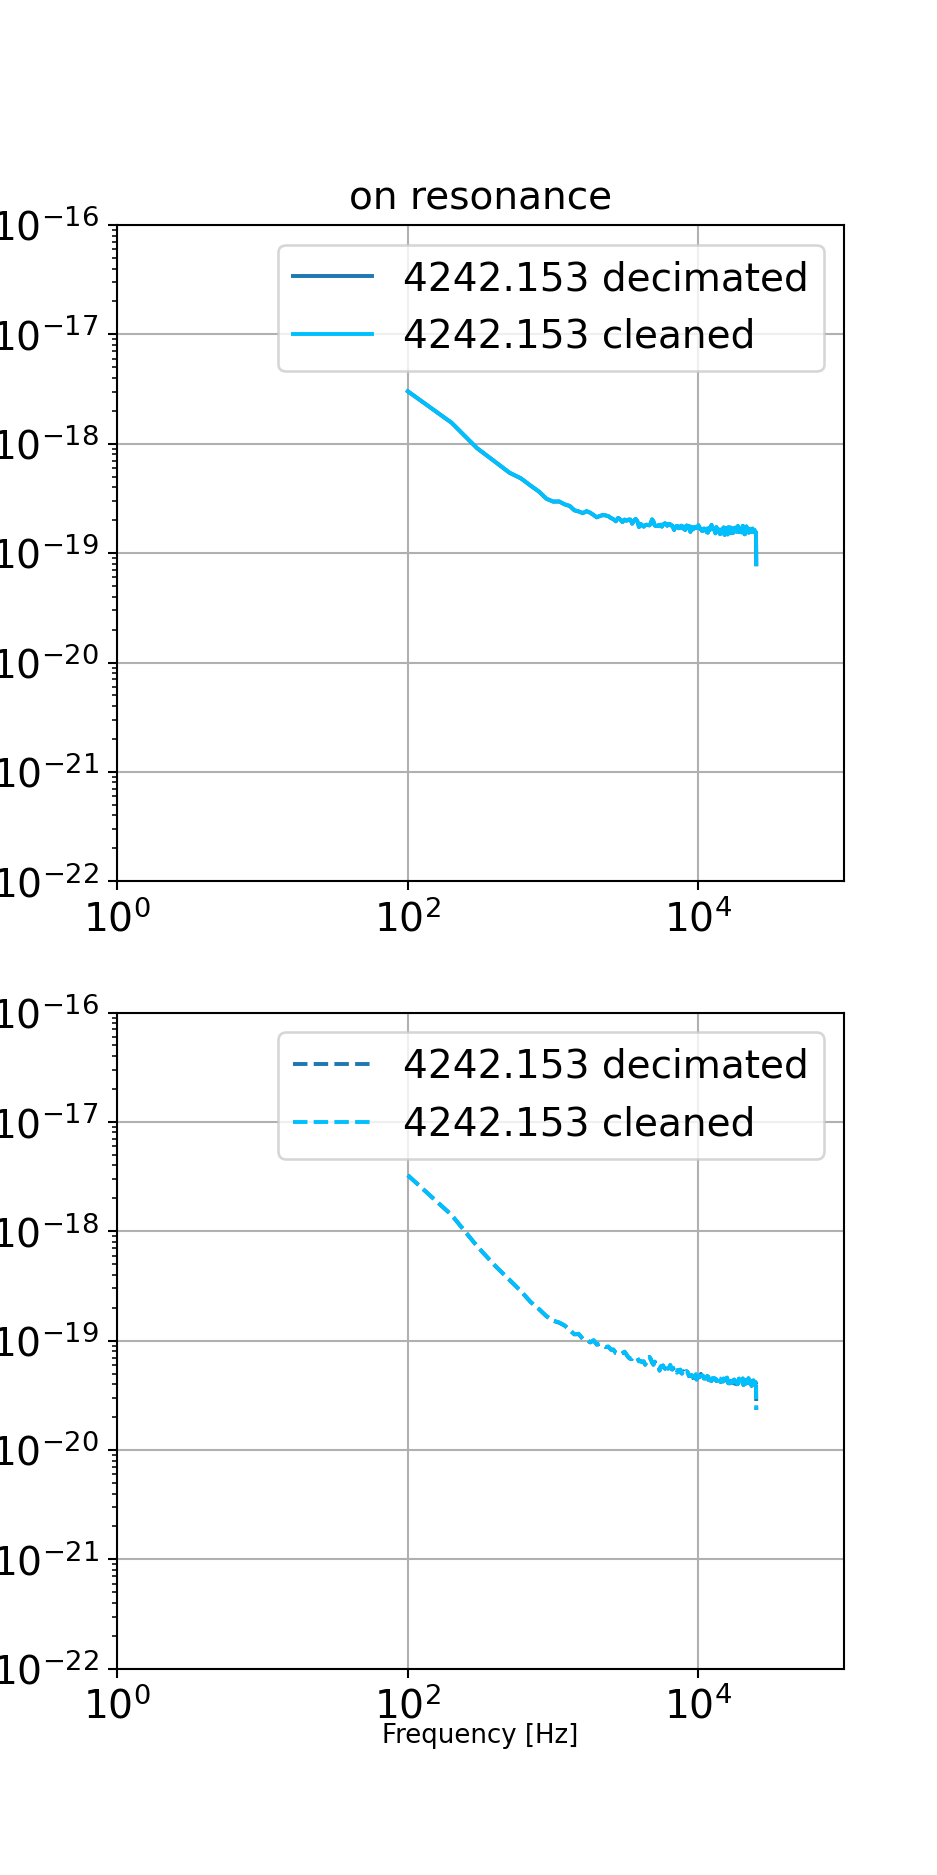

In [8]:
powers_, PSDs_, res_, timestreams_ = Thf.CleanPSDs(None,None,series=series, f_transient=0.05)

<IPython.core.display.Javascript object>


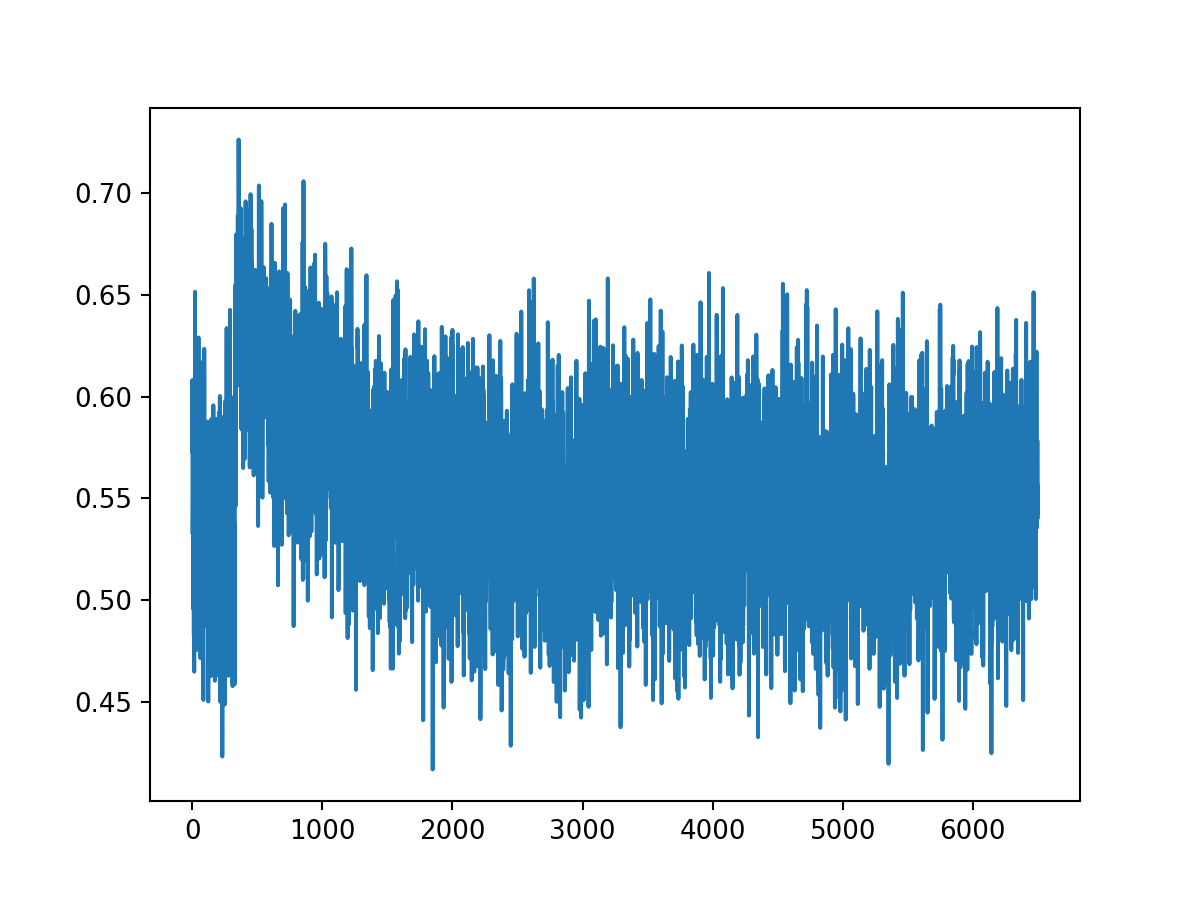

array([0.5730884 , 0.6081792 , 0.5344819 , ..., 0.5398824 , 0.54702634,
       0.57750905], dtype=float32)

In [9]:
Ptt.PlotPulse(res["Phase"], 6.4215, p_index=0, fig_obj=None,
              pulse_rate_Hz=100, win_fac=0.65,
              baseline=None, complx=False)

<IPython.core.display.Javascript object>


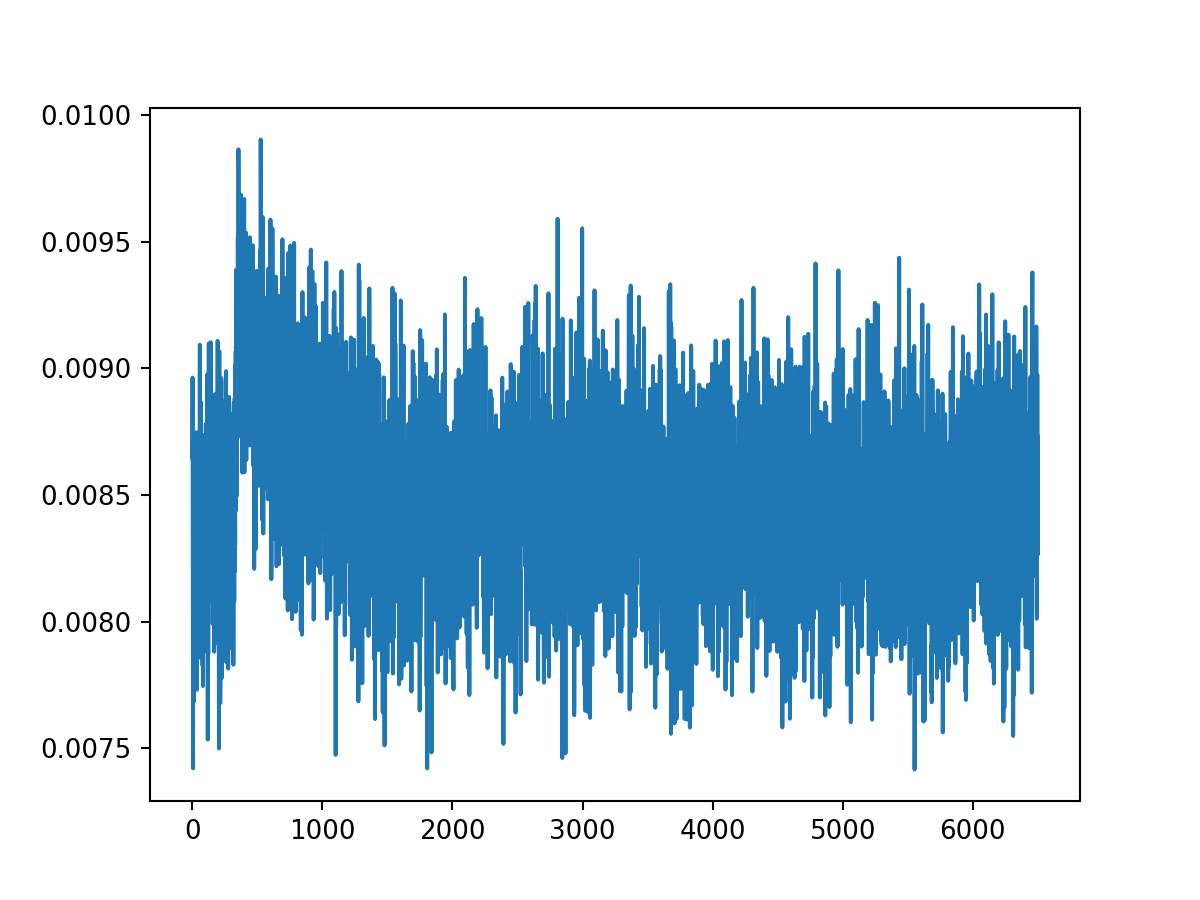

array([0.00864779, 0.00872478, 0.0089641 , ..., 0.00856364, 0.00826305,
       0.00873013], dtype=float32)

In [10]:
Ptt.PlotPulse(res["Magnitude"], 6.4215, p_index=0, fig_obj=None,
              pulse_rate_Hz=100, win_fac=0.65,
              baseline=None, complx=False)

<IPython.core.display.Javascript object>


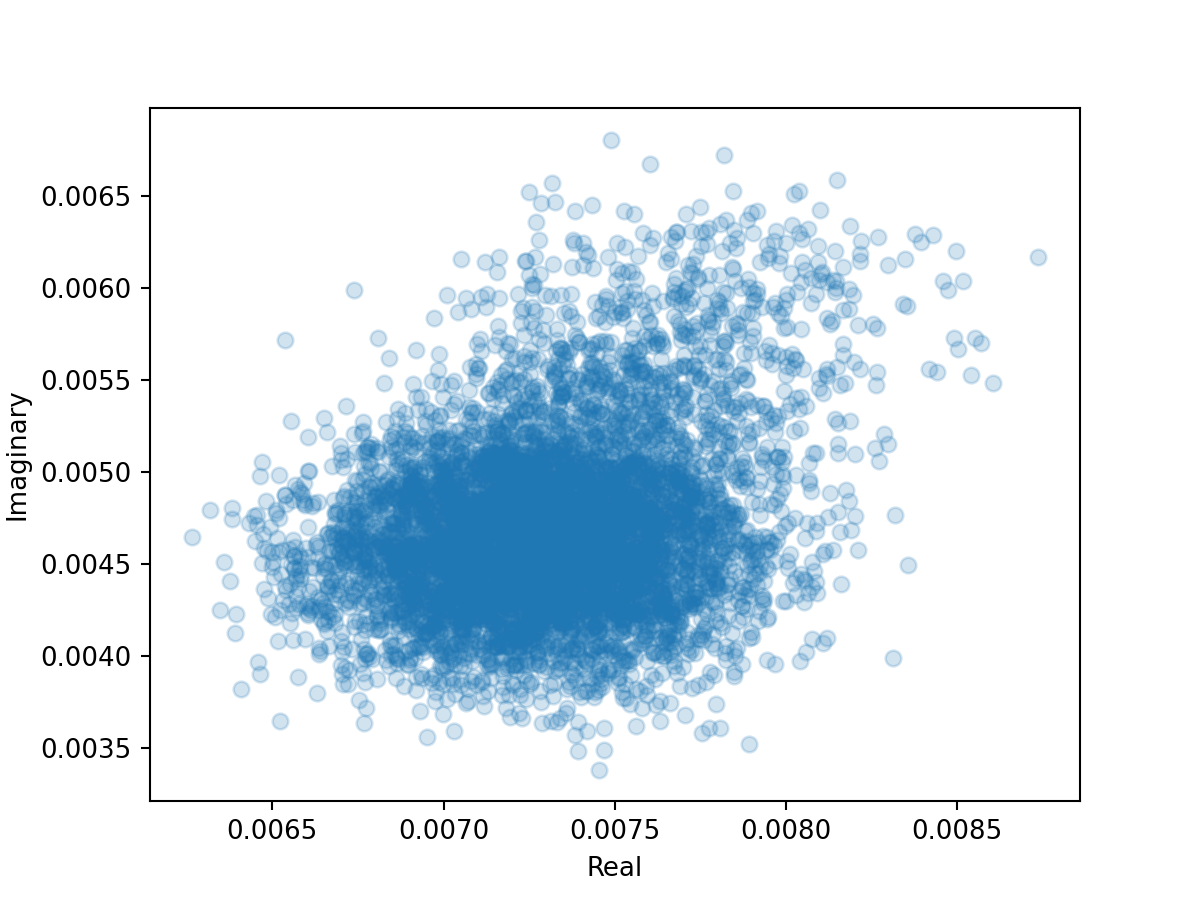

Text(0, 0.5, 'Imaginary')

In [21]:
Ptt.PlotPulse(res["Magnitude"]*np.exp(1j*res["Phase"]), 6.4215, p_index=int(npulses*np.random.rand()), fig_obj=None,
              pulse_rate_Hz=100, win_fac=0.65,
              baseline=None, complx=True)
ax0 = plt.gca()
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")